<a href="https://colab.research.google.com/github/alanmejiaa/Procesamiento-y-Clasificacion-de-Datos-2024/blob/main/Tarea%20%233.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarea #3**

## Tarea (10 puntos)

- Hacer diseño de experimentos para comparar modelos y sus hiperparámetros con relación a la clasificación de textos
- Escribir un reporte con los hallazgos, metodología y resultados en PDF y subirlo en una sección claramente identificable de tu repositorio.

En esta ocasion seleccionamos reseñas a cerca del parque de diversiones Disney, por lo que queremos clasificar los resultados de acuerdo a que tan buena o mala es la reseña

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import warnings

In [2]:
# Ignorar advertencias
warnings.filterwarnings('ignore')

In [4]:
# Cargar datos
df_reviews = pd.read_csv('disney.csv', encoding='latin-1')
df_reviews = df_reviews[['Review_Text', 'Rating']]

In [5]:
# Clasificación de reseñas
df_reviews['Label'] = df_reviews['Rating'].apply(lambda x: 'Good' if x > 3 else 'Bad')

In [6]:
# Información del DataFrame
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_Text  42656 non-null  object
 1   Rating       42656 non-null  int64 
 2   Label        42656 non-null  object
dtypes: int64(1), object(2)
memory usage: 999.9+ KB


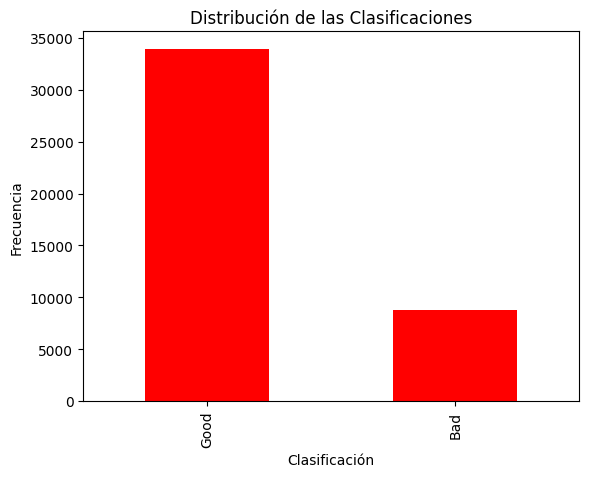

In [8]:
# Gráfico de distribución de clasificaciones
df_reviews['Label'].value_counts().plot(kind='bar', color='red')
plt.title('Distribución de las Clasificaciones')
plt.xlabel('Clasificación')
plt.ylabel('Frecuencia')
plt.show()

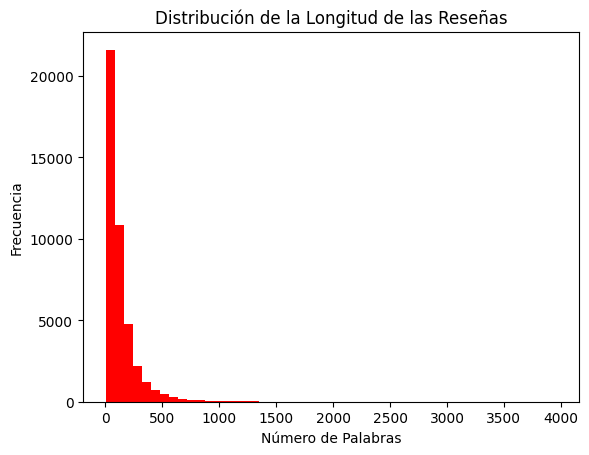

In [9]:
# Longitud de las reseñas
df_reviews['Review_Length'] = df_reviews['Review_Text'].apply(lambda x: len(str(x).split()))
df_reviews['Review_Length'].plot(kind='hist', bins=50, color='red')
plt.title('Distribución de la Longitud de las Reseñas')
plt.xlabel('Número de Palabras')
plt.ylabel('Frecuencia')
plt.show()

In [10]:
# Descargar recursos de NLTK
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [11]:
# Preprocesamiento del texto
def preprocess_text(text):
    if not isinstance(text, (str, bytes)):
        return ""

    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)


In [12]:
df_reviews['Cleaned_Review'] = df_reviews['Review_Text'].apply(preprocess_text)

In [13]:
print(df_reviews[['Review_Text', 'Cleaned_Review', 'Label']].head())

                                         Review_Text  \
0  If you've ever been to Disneyland anywhere you...   
1  Its been a while since d last time we visit HK...   
2  Thanks God it wasn   t too hot or too humid wh...   
3  HK Disneyland is a great compact park. Unfortu...   
4  the location is not in the city, took around 1...   

                                      Cleaned_Review Label  
0  ever disneyland anywhere find disneyland hong ...  Good  
1  since last time visit hk disneyland yet time s...  Good  
2  thanks god hot humid visiting park otherwise w...  Good  
3  hk disneyland great compact park unfortunately...  Good  
4  location city took around 1 hour kowlon kid li...  Good  


In [14]:
# División de los datos en conjuntos de entrenamiento y prueba
X = df_reviews['Cleaned_Review']
y = df_reviews['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Vectorizadores y modelos
vectorizers = {
    "Count n-grams": CountVectorizer(ngram_range=(2, 3)),
    "TF-IDF": TfidfVectorizer(),
    "TF-IDF n-grams": TfidfVectorizer(ngram_range=(2, 3))
}

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
}

In [17]:
# Entrenamiento y evaluación
results = []

for vec_name, vectorizer in vectorizers.items():
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    for model_name, model in models.items():
        model.fit(X_train_vec, y_train)
        y_pred = model.predict(X_test_vec)

        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        cm = confusion_matrix(y_test, y_pred)

        results.append({
            "Model": model_name,
            "Vectorizer": vec_name,
            "Accuracy": accuracy,
            "Report": report,
            "Confusion Matrix": cm
        })


In [18]:
for result in results:
    print(f"Model: {result['Model']} with {result['Vectorizer']}")
    print("Accuracy:", result["Accuracy"])
    df_report = pd.DataFrame(result["Report"]).transpose()
    print(df_report)
    print("\n" + "="*80 + "\n")

Model: Logistic Regression with Count n-grams
Accuracy: 0.8543131739334271
              precision    recall  f1-score      support
Bad            0.812195  0.379487  0.517282  1755.000000
Good           0.858791  0.977276  0.914211  6777.000000
accuracy       0.854313  0.854313  0.854313     0.854313
macro avg      0.835493  0.678382  0.715746  8532.000000
weighted avg   0.849207  0.854313  0.832564  8532.000000


Model: Random Forest with Count n-grams
Accuracy: 0.7943037974683544
              precision    recall  f1-score      support
Bad            0.000000  0.000000  0.000000  1755.000000
Good           0.794304  1.000000  0.885362  6777.000000
accuracy       0.794304  0.794304  0.794304     0.794304
macro avg      0.397152  0.500000  0.442681  8532.000000
weighted avg   0.630919  0.794304  0.703246  8532.000000


Model: Logistic Regression with TF-IDF
Accuracy: 0.8791608063759963
              precision    recall  f1-score      support
Bad            0.795752  0.554986  0.653911

In [19]:
# Vectorización y entrenamiento del mejor modelo
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [20]:
best_model = LogisticRegression(C=1.0, solver='liblinear')
best_model.fit(X_train_vec, y_train)
y_pred = best_model.predict(X_test_vec)

In [21]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

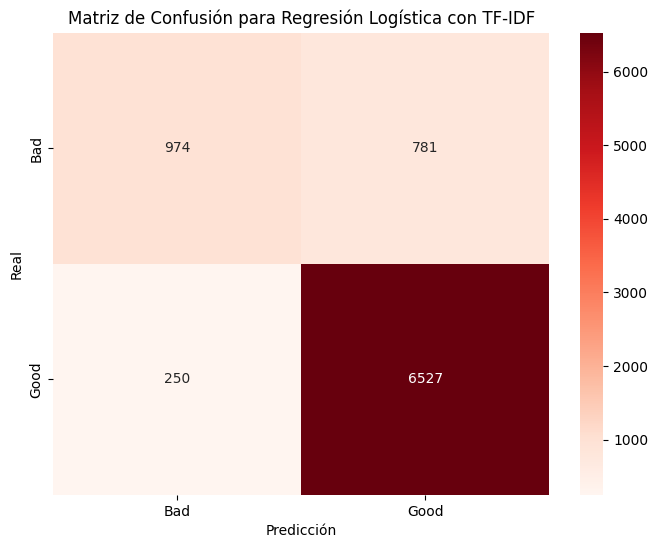

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.title('Matriz de Confusión para Regresión Logística con TF-IDF')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [25]:
# Parámetros ajustados
lr_params = {
    'C': 0.5,
    'solver': 'liblinear'
}

rf_params = {
    'n_estimators': 200,
    'max_depth': 20,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'random_state': 42
}

models_adjusted = {
    "Logistic Regression (Adjusted)": LogisticRegression(**lr_params),
    "Random Forest (Adjusted)": RandomForestClassifier(**rf_params)
}

In [26]:
# Combinamos modelos ajustados con los originales
models.update(models_adjusted)

In [27]:
# Entrenamiento y evaluación de modelos ajustados
results = []

for vec_name, vectorizer in vectorizers.items():
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    for model_name, model in models.items():
        model.fit(X_train_vec, y_train)
        y_pred = model.predict(X_test_vec)

        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        cm = confusion_matrix(y_test, y_pred)

        results.append({
            "Model": model_name,
            "Vectorizer": vec_name,
            "Accuracy": accuracy,
            "Report": report,
            "Confusion Matrix": cm
        })

In [28]:
for result in results:
    print(f"Model: {result['Model']} with {result['Vectorizer']}")
    print("Accuracy:", result["Accuracy"])
    df_report = pd.DataFrame(result["Report"]).transpose()
    print(df_report)
    print("\n" + "="*80 + "\n")


Model: Logistic Regression with Count n-grams
Accuracy: 0.8543131739334271
              precision    recall  f1-score      support
Bad            0.812195  0.379487  0.517282  1755.000000
Good           0.858791  0.977276  0.914211  6777.000000
accuracy       0.854313  0.854313  0.854313     0.854313
macro avg      0.835493  0.678382  0.715746  8532.000000
weighted avg   0.849207  0.854313  0.832564  8532.000000


Model: Random Forest with Count n-grams
Accuracy: 0.7943037974683544
              precision    recall  f1-score      support
Bad            0.000000  0.000000  0.000000  1755.000000
Good           0.794304  1.000000  0.885362  6777.000000
accuracy       0.794304  0.794304  0.794304     0.794304
macro avg      0.397152  0.500000  0.442681  8532.000000
weighted avg   0.630919  0.794304  0.703246  8532.000000


Model: Logistic Regression (Adjusted) with Count n-grams
Accuracy: 0.8540787623066104
              precision    recall  f1-score      support
Bad            0.821970  

In [29]:
# Vectorización y entrenamiento del mejor modelo ajustado
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [30]:
best_model = LogisticRegression(C=0.5, solver='liblinear')
best_model.fit(X_train_vec, y_train)
y_pred = best_model.predict(X_test_vec)

In [31]:
# Matriz de confusión del mejor modelo ajustado
cm = confusion_matrix(y_test, y_pred)

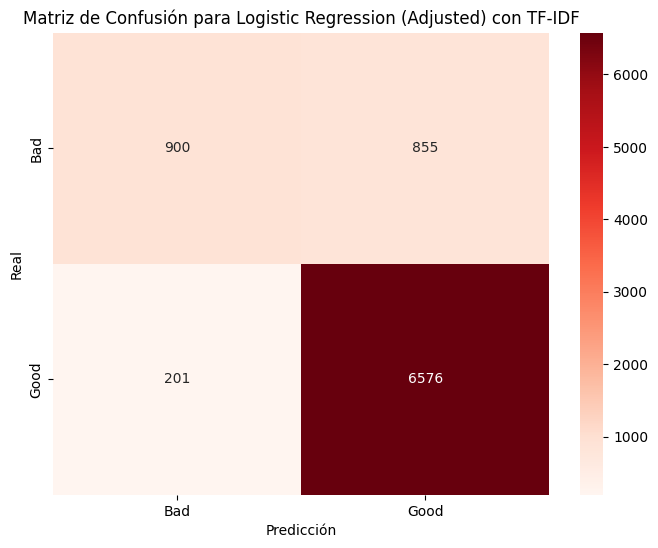

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.title('Matriz de Confusión para Logistic Regression (Adjusted) con TF-IDF')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()